# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

## Get data

In [2]:
N1 = 9990
N2 = 10
data_clf = data.get_non_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

original


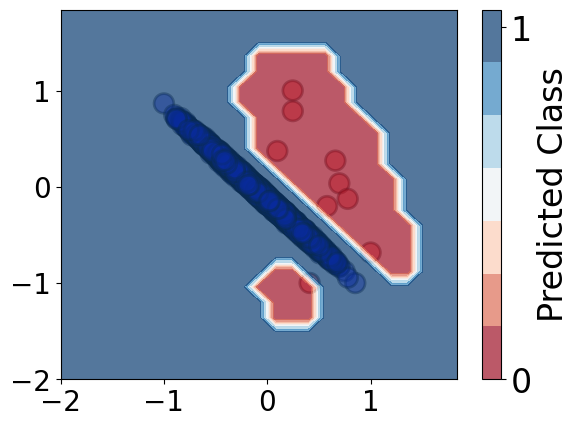

SMOTE


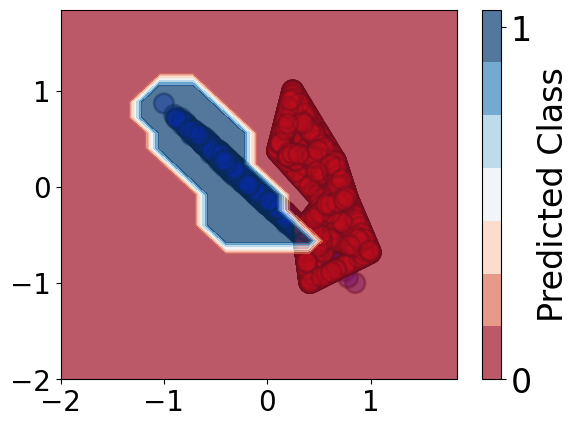

balanced_weights


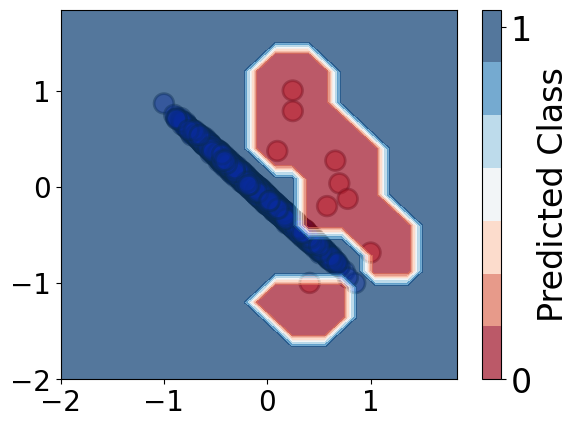

Bayes Minimum Risk


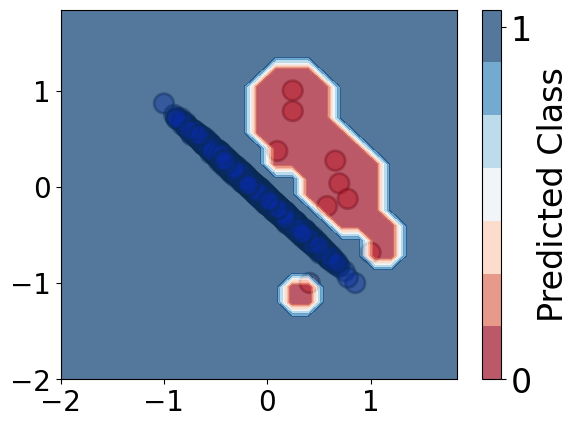

Bayes Minimum Risk (Not calibrated)


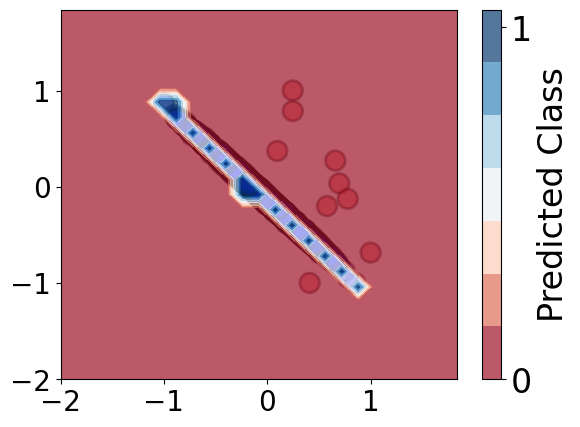

Thresholding


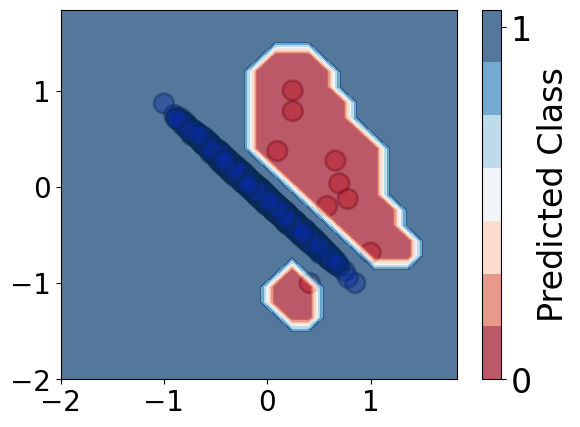

In [3]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=False)
data_clf['clf'] = classifiers_dict['Original']                      

## Fit deltas

In [1]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(
    X, y, alpha=1, _print=True, _plot=True, max_trials=100, method='supports-prop-update_mean-margin_only', parallel=False)

NameError: name 'data_clf' is not defined

## Show parameters

In [5]:
deltas_model.print_params()
deltas_model.print_deltas()

Parameters
                R:  1.2462272492942128
                N1: 9989
                N2: 9
                R1: 0.04132250985869401
                R2: 0.5630626864421657
                M:  1.2214174081892883
                D:  1.825802604490148
                C1: 1
                C2: 1
"
                  delta1: 0.0002 
                  delta2: 4.112062439508522e-05
                  constraint: 0.0
                  


# Evaluation on test data

                                     accuracy    G-Mean  ROC-AUC  \
Method                                                             
original                              0.80275  0.778139  0.80275   
SMOTE                                 0.95310  0.952745  0.95310   
balanced_weights                      0.85885  0.849490  0.85885   
Bayes Minimum Risk                    0.76645  0.730000  0.76645   
Bayes Minimum Risk (Not calibrated)   0.95285  0.951688  0.95285   
Thresholding                          0.78950  0.760920  0.78950   
deltas                                0.96810  0.967632  0.96810   

                                     precision1 (red)  precision2 (blue)  \
Method                                                                     
original                                     0.717103           1.000000   
SMOTE                                        0.930703           0.977954   
balanced_weights                             0.786416           0.980324   
Bayes M

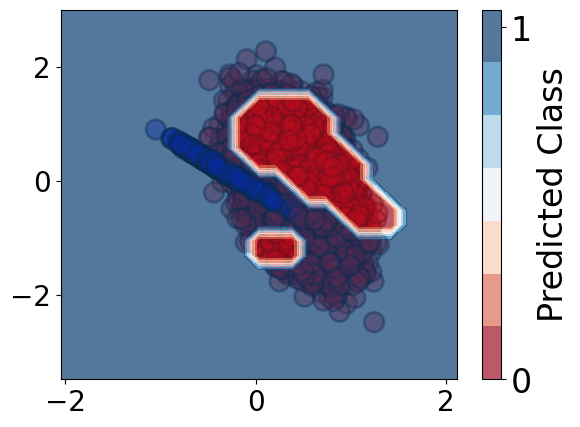

SMOTE


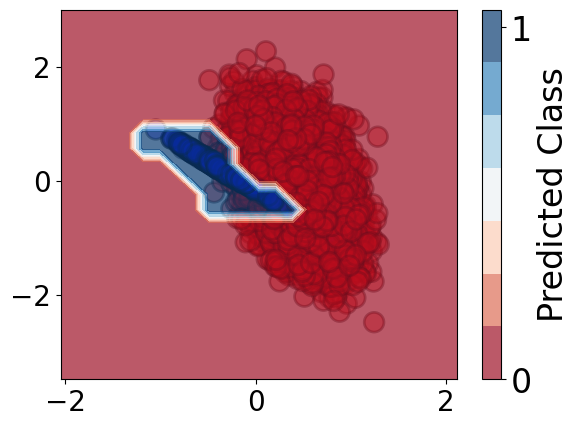

balanced_weights


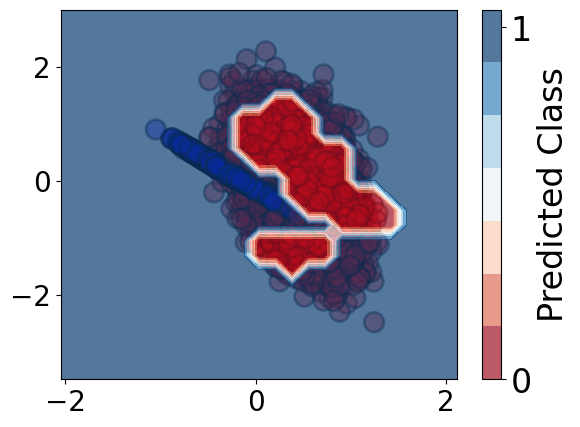

Bayes Minimum Risk


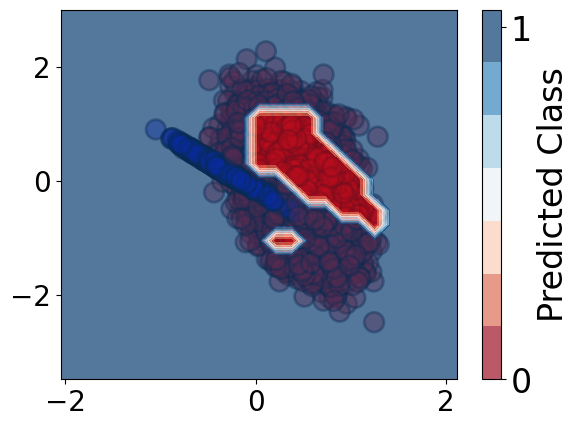

Bayes Minimum Risk (Not calibrated)


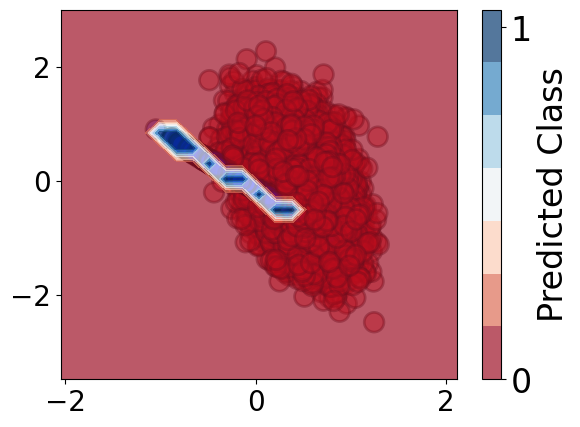

Thresholding


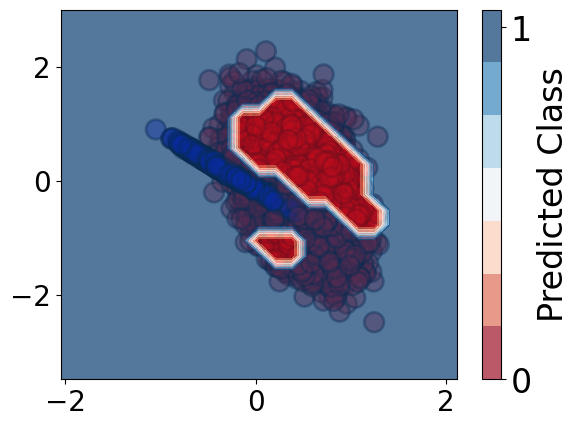

deltas


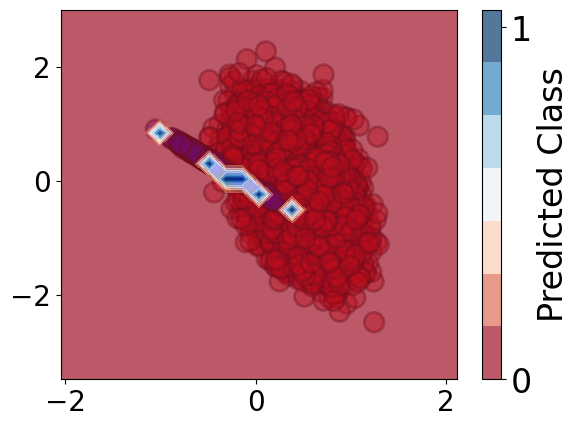

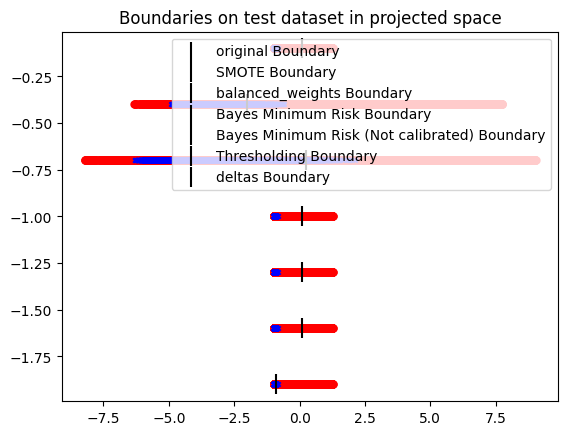

LATEX table format


\begin{tabular}{lrrrrrrrrl}
\toprule
 & accuracy & G-Mean & ROC-AUC & precision1 (red) & precision2 (blue) & precision & recall & F1 & F-score-1 \\
Method &  &  &  &  &  &  &  &  &  \\
\midrule
original & 0.802750 & 0.778139 & 0.802750 & 0.717103 & 1.000000 & 0.717103 & 1.000000 & 0.754282 & [0.83524744 0.75428216] \\
SMOTE & 0.953100 & 0.952745 & 0.953100 & 0.930703 & 0.977954 & 0.930703 & 0.979100 & 0.951848 & [0.9542885  0.95184805] \\
balanced_weights & 0.858850 & 0.849490 & 0.858850 & 0.786416 & 0.980324 & 0.786416 & 0.985300 & 0.838418 & [0.87469484 0.83841795] \\
Bayes Minimum Risk & 0.766450 & 0.730000 & 0.766450 & 0.681617 & 1.000000 & 0.681617 & 1.000000 & 0.695283 & [0.8106684  0.69528345] \\
Bayes Minimum Risk (Not calibrated) & 0.952850 & 0.951688 & 0.952850 & 0.913902 & 0.999890 & 0.913902 & 0.999900 & 0.950522 & [0.95496872 0.95052206] \\
Thresholding & 0.789500 & 0.760920 & 0.789500 & 0.703730 & 1.000000 & 0.703730 & 1.000000 & 0.733376 & [0.8261049

,accuracy,G-Mean,ROC-AUC,precision1 (red),precision2 (blue),precision,recall,F1,F-score-1
Method,,,,,,,,,
original,0.80275,0.778139,0.80275,0.717103,1.000000,0.717103,1.0000,0.754282,"[0.8352474420547087, 0.7542821550918717]"
SMOTE,0.95310,0.952745,0.95310,0.930703,0.977954,0.930703,0.9791,0.951848,"[0.9542884990253411, 0.9518480492813142]"
balanced_weights,0.85885,0.849490,0.85885,0.786416,0.980324,0.786416,0.9853,0.838418,"[0.874694837764659, 0.8384179497452923]"
Bayes Minimum Risk,0.76645,0.730000,0.76645,0.681617,1.000000,0.681617,1.0000,0.695283,"[0.8106683960925782, 0.6952834496705591]"
Bayes Minimum Risk (Not calibrated),0.95285,0.951688,0.95285,0.913902,0.999890,0.913902,0.9999,0.950522,"[0.9549687216465307, 0.9505220630673173]"
Thresholding,0.78950,0.760920,0.78950,0.703730,1.000000,0.703730,1.0000,0.733376,"[0.8261049153242461, 0.733375554148195]"
deltas,0.96810,0.967632,0.96810,0.941520,0.998085,0.941520,0.9982,0.967110,"[0.9690321328026406, 0.9671100113413754]"


In [6]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=True)